In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to get and return parsed HTML
def get_soup(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

# Initialize list to store reviews data later on
reviewlist = []


In [2]:
import nltk
nltk.download('stopwords')


import requests
import pandas as pd
import numpy as np
import re, string, nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
stopwords = list(nltk.corpus.stopwords.words('english'))
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Function that sifts through the soup element above, tries to find the tags for the data we want, then appends to the list we initialized
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.ca:Customer reviews: ', '').strip(), 
            'date': item.find('span', {'data-hook': 'review-date'}).text.strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass


In [4]:
# Function 3: loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in range(1,20):
    soup = get_soup(f'https://www.amazon.in/mCaffeine-Coffee-Moisturization-Paraben-Mineral/product-reviews/B07YL51LP7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df.to_csv(r'body_lotion.csv', index=False)
print('Fin.')

Getting page: 1
10
Getting page: 2
10
Getting page: 3
20
Getting page: 4
20
Getting page: 5
30
Getting page: 6
40
Getting page: 7
50
Getting page: 8
50
Getting page: 9
60
Getting page: 10
60
Getting page: 11
70
Getting page: 12
80
Getting page: 13
80
Getting page: 14
80
Getting page: 15
80
Getting page: 16
80
Getting page: 17
80
Getting page: 18
80
Getting page: 19
80
Fin.


In [5]:
corpus = pd.read_csv('body_lotion.csv')
corpus

,product,date,title,rating,body
0,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 26 December 2022,Body lotion,4.0,"People with not very dry skin, it's good for t..."
1,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 22 November 2022,Product nice packaging poor,4.0,Product is nice however the pump is not functi...
2,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 2 December 2022,Good,3.0,Just good
3,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 11 November 2022,I love mcaffeine product,5.0,I like this product because it's light weight ...
4,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 19 November 2022,Nice,5.0,Like
...,...,...,...,...,...
75,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 10 January 2022,Overpriced...,1.0,Frankly speaking I've used so many body lotion...
76,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 17 April 2021,Not for winters,2.0,Good product but not good for winters
77,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 9 January 2020,Average,3.0,The scent is too pathetic😑
78,Amazon.in:Customer reviews: mCaffeine Coffee B...,Reviewed in India 🇮🇳 on 2 July 2020,Nice,5.0,It is really good 😊


In [6]:
df=corpus[['body']]

In [7]:
df.columns

Index(['body'], dtype='object')

In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [9]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

In [10]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [11]:
import string   
import re

def clean_text(text):
    lemma = WordNetLemmatizer()
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    text_cleaned="".join([a for a in text_cleaned if not a.isdigit()])
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    
    text_cleaned=" ".join([lemma.lemmatize(token) for token in tokens])
    
    
    return text_cleaned

In [12]:
df['cleaned_reviews']=df['body'].astype(str).apply(lambda x:clean_text(x))

C:\Users\ishag\AppData\Local\Temp/ipykernel_31532/2523326079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_reviews']=df['body'].astype(str).apply(lambda x:clean_text(x))


In [13]:
df.sample(5)

,body,cleaned_reviews
12,This is the best moisturiser I ever Used. My s...,best moisturiser ever used skin feel moisturis...
15,It is a good moisturizing lotion for dry skin....,good moisturizing lotion dry skin scent lotion...
9,It's a good product but it's either for summer...,good product either summer normal oily winter ...
73,Good moisturiser for full body frangrance stay...,good moisturiser full body frangrance stay lit...
50,It is a good moisture but it is not that good ...,good moisture good dry skin winter give matte ...


In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from collections import Counter

In [16]:
reviews=df['cleaned_reviews']

In [17]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

In [18]:
top_30_review_words=getMostCommon(reviews,30)

In [19]:
top_30_review_words

[('skin', 52),
 ('good', 48),
 ('product', 42),
 ('smell', 28),
 ('lotion', 28),
 ('coffee', 22),
 ('really', 18),
 ('body', 18),
 ('dry', 14),
 ('like', 14),
 ('fragrance', 12),
 ('scent', 11),
 ('amazing', 10),
 ('love', 10),
 ('great', 9),
 ('feel', 9),
 ('long', 9),
 ('nice', 8),
 ('winter', 8),
 ('doesnt', 8),
 ('aroma', 7),
 ('perfect', 7),
 ('oily', 7),
 ('mcaffeine', 7),
 ('soothing', 7),
 ('must', 7),
 ('best', 7),
 ('time', 7),
 ('strong', 7),
 ('sticky', 7)]

In [20]:
# Add stop words 
new_stopwords = ['mcaffeine','using','like','give','really','lotion','product']
STOPWORDS.extend(new_stopwords)

In [21]:
import string   
import re

def clean_text(text):
    lemma = WordNetLemmatizer()
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    text_cleaned="".join([a for a in text_cleaned if not a.isdigit()])
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    
    text_cleaned=" ".join([lemma.lemmatize(token) for token in tokens])
    
    
    return text_cleaned

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

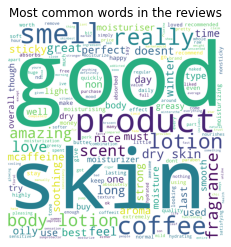

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

In [24]:
import numpy as np
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [25]:
norm_corpus = normalize_corpus(df['cleaned_reviews'])
norm_corpus
print(len(norm_corpus))

80


In [26]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ishag\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
df.drop_duplicates(subset ="cleaned_reviews", keep = "first", inplace = True)
df['cleaned_reviews'] = df['cleaned_reviews'].astype('str')
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df['Polarity'] = df['cleaned_reviews'].apply(get_polarity)
df.head(8)

C:\Users\ishag\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\ishag\AppData\Local\Temp/ipykernel_31532/3356210026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_reviews'] = df['cleaned_reviews'].astype('str')
C:\Users\ishag\AppData\Local\Temp/ipykernel_31532/3356210026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,body,cleaned_reviews,Polarity
0,"People with not very dry skin, it's good for t...",people dry skin good,3.166667e-01
1,Product is nice however the pump is not functi...,product nice however pump functioning remove m...,6.000000e-01
2,Just good,good,7.000000e-01
3,I like this product because it's light weight ...,like product light weight non greasy overall m...,4.666667e-01
4,Like,like,0.000000e+00
5,Very smooth and amazing aroma. I will buy it a...,smooth amazing aroma buy,5.000000e-01
6,Really love this product,really love product,5.000000e-01
7,"This product smells really bad, not at all lik...",product smell really bad like coffee anything ...,5.551115e-17


In [28]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'
df.tail(10)

C:\Users\ishag\AppData\Local\Temp/ipykernel_31532/3032435779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Type']=''
C:\Users\ishag\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,body,cleaned_reviews,Polarity,Sentiment_Type
70,Good for oily skin,good oily skin,0.700000,POSITIVE
71,Good moisturiser.,good moisturiser,0.700000,POSITIVE
72,Very nice product n really non greasy .. must ...,nice product n really non greasy must buy one ...,0.433333,POSITIVE
73,Good moisturiser for full body frangrance stay...,good moisturiser full body frangrance stay lit...,0.382500,POSITIVE
74,Overall aroma of coffee was ruined by addition...,overall aroma coffee ruined addition white lil...,-0.104167,NEGATIVE
75,Frankly speaking I've used so many body lotion...,frankly speaking ive used many body lotion thi...,0.461429,POSITIVE
76,Good product but not good for winters,good product good winter,0.700000,POSITIVE
77,The scent is too pathetic😑,scent pathetic,-1.000000,NEGATIVE
78,It is really good 😊,really good,0.700000,POSITIVE
79,Light non-sticky moisturizer with soothing smell.,light nonsticky moisturizer soothing smell,0.400000,POSITIVE


<AxesSubplot:title={'center':'Sentiment Analysis'}>

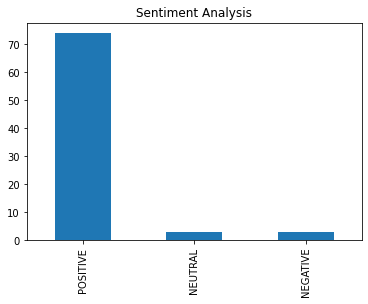

In [29]:
df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [30]:
from nrclex import NRCLex

In [31]:
df['Emotions']= df['cleaned_reviews'].apply(lambda x:NRCLex(x).affect_frequencies)
df.head()

,body,cleaned_reviews,Polarity,Sentiment_Type,Emotions
0,"People with not very dry skin, it's good for t...",people dry skin good,0.316667,POSITIVE,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
1,Product is nice however the pump is not functi...,product nice however pump functioning remove m...,0.600000,POSITIVE,"{'fear': 0.25, 'anger': 0.25, 'anticip': 0.0, ..."
2,Just good,good,0.700000,POSITIVE,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,I like this product because it's light weight ...,like product light weight non greasy overall m...,0.466667,POSITIVE,"{'fear': 0.1, 'anger': 0.0, 'anticip': 0.0, 't..."
4,Like,like,0.000000,NEUTRAL,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [32]:
df = pd.concat([df.drop(['Emotions'],axis =1),df['Emotions'].apply(pd.Series)],axis =1)
df.head()

,body,cleaned_reviews,Polarity,Sentiment_Type,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,"People with not very dry skin, it's good for t...",people dry skin good,0.316667,POSITIVE,0.00,0.00,0.0,0.2,0.2,0.2,0.00,0.00,0.0,0.2,0.2
1,Product is nice however the pump is not functi...,product nice however pump functioning remove m...,0.600000,POSITIVE,0.25,0.25,0.0,0.0,0.0,0.0,0.25,0.25,0.0,0.0,NaN
2,Just good,good,0.700000,POSITIVE,0.00,0.00,0.0,0.2,0.2,0.2,0.00,0.00,0.0,0.2,0.2
3,I like this product because it's light weight ...,like product light weight non greasy overall m...,0.466667,POSITIVE,0.10,0.00,0.0,0.1,0.1,0.1,0.10,0.10,0.2,0.1,0.1
4,Like,like,0.000000,NEUTRAL,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,NaN


In [33]:
df3 = pd.concat([corpus, df], axis = 1)
print(df3)

                                              product  \
0   Amazon.in:Customer reviews: mCaffeine Coffee B...   
1   Amazon.in:Customer reviews: mCaffeine Coffee B...   
2   Amazon.in:Customer reviews: mCaffeine Coffee B...   
3   Amazon.in:Customer reviews: mCaffeine Coffee B...   
4   Amazon.in:Customer reviews: mCaffeine Coffee B...   
..                                                ...   
75  Amazon.in:Customer reviews: mCaffeine Coffee B...   
76  Amazon.in:Customer reviews: mCaffeine Coffee B...   
77  Amazon.in:Customer reviews: mCaffeine Coffee B...   
78  Amazon.in:Customer reviews: mCaffeine Coffee B...   
79  Amazon.in:Customer reviews: mCaffeine Coffee B...   

                                        date                        title  \
0   Reviewed in India 🇮🇳 on 26 December 2022                  Body lotion   
1   Reviewed in India 🇮🇳 on 22 November 2022  Product nice packaging poor   
2    Reviewed in India 🇮🇳 on 2 December 2022                         Good   
3   Rev

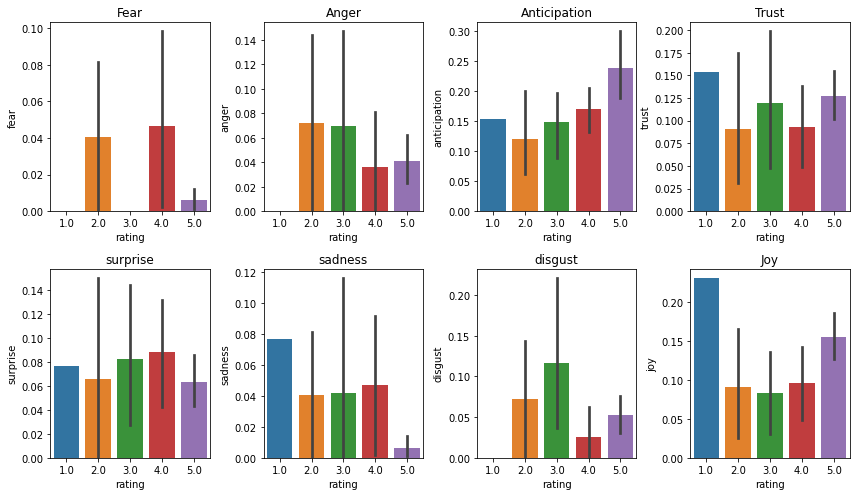

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 4, figsize=(12, 7))
sns.barplot(data=df3, x='rating', y='fear', ax=axs[0,0])
sns.barplot(data=df3, x='rating', y='anger', ax=axs[0,1])
sns.barplot(data=df3, x='rating', y='anticipation', ax=axs[0,2])
sns.barplot(data=df3, x='rating', y='trust',ax=axs[0,3])

sns.barplot(data=df3, x='rating', y='surprise', ax=axs[1,0])
sns.barplot(data=df3, x='rating', y='sadness', ax=axs[1,1])
sns.barplot(data=df3, x='rating', y='disgust', ax=axs[1,2])
sns.barplot(data=df3, x='rating', y='joy',ax=axs[1,3])


axs[0,0].set_title('Fear')
axs[0,1].set_title('Anger')
axs[0,2].set_title('Anticipation')
axs[0,3].set_title('Trust')

axs[1,0].set_title('surprise')
axs[1,1].set_title('sadness')
axs[1,2].set_title('disgust')
axs[1,3].set_title('Joy')
plt.tight_layout()
plt.show()

### Interpretation
1. The reviews are mostly positive. This can be considered as a good health for the product.
2. The Ratings for fear is less which is a positive thing
3. The brand was able to generate significant anticipation
4. The trust factor is mostly average the company should work on it